# Wiktor Ciołek 311501 SATFD laboratory 4 27.04.2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import matlab
from scipy import signal

plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 8

# 1. Introduction
The laboratory reported in this notebook relates to digital signal filtering. *Scipy.signal* module is utilized to present filtering capability that pertains to different problems. There were three tasks to be tackled:
1. **Noisy sine wave** Artificial signal of a given samplling frequency was created as a superposition of sine wave with its parameters (Amplitude, frequency) and noise generated from normal distibution.
2. **Two sine waves** Superposition of two sine waves with differing aplitude and frequency but with same initial phase. 
3. **ECG signal** Electrocardiographical data was imported from a file. The goal was to prepare it for proper cardial analysis.

# 2. Noisy sine wave
The cells below pertain the noisy sine wave created with given parameters. Next to the signal, frequency spectrum is displayed, where one can observe the frequency of a pure wave as well as various other frequencies comming from the gaussian noise. Interestingly enough, there is scarcely any frequency that is not present in the spectrum. We will be trying to obtain either exclusively noise or the wave.

(-60.0, 60.0)

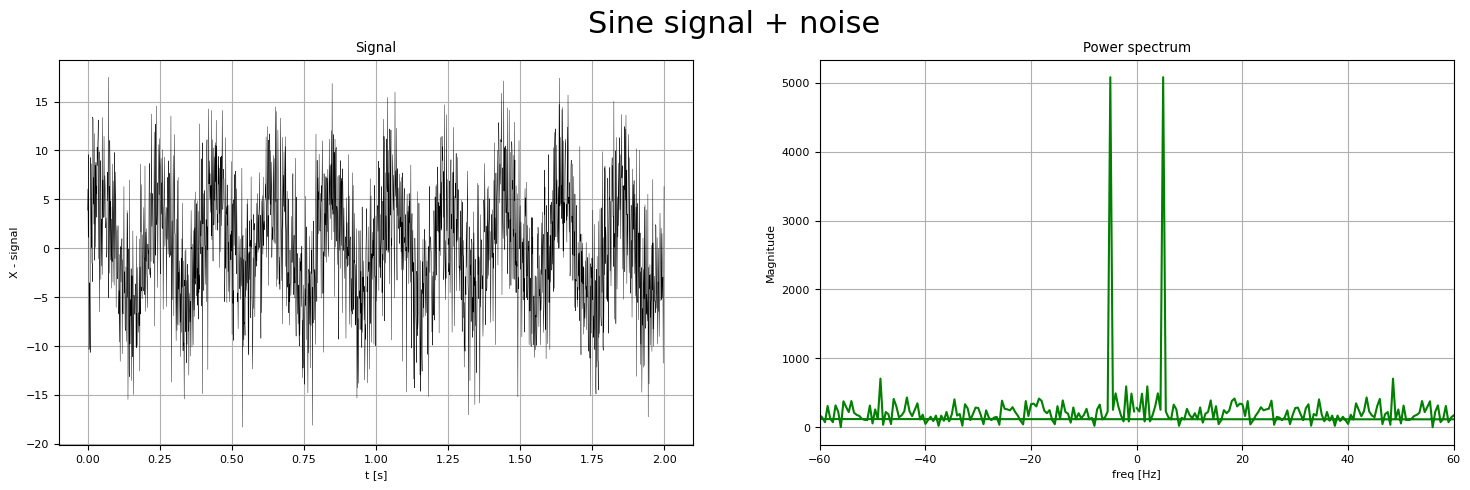

In [3]:
N = 2000
A = 5
f = 5
fs = 1000
dt = 1 / fs

T = np.arange(N) / fs
X = A * np.sin(2 * np.pi * f * T) + A * np.random.randn(N)

plt.figure(figsize=(18, 5))
plt.suptitle('Sine signal + noise', fontsize=22)

plt.subplot(121)
plt.plot(T, X, 'k-', linewidth = 0.3)
plt.xlabel('t [s]')
plt.ylabel('X - signal')
plt.title('Signal')

ft = np.abs(np.fft.fft(X))
freq = np.fft.fftfreq(len(T), 1/fs)

plt.subplot(122)
plt.plot(freq, ft, 'g-')
plt.xlabel('freq [Hz]')
plt.ylabel('Magnitude')
plt.title('Power spectrum')
plt.xlim(-60, 60)

From now on, all filtering operations' results will be presented in 3-column figures. The plots displayed in those columns are subsequently:
* signal after filtration
* response characteristic on a log-lin scale
* spectrum of the filtered signal

## FIR
First, FIR (Finite Impulse Response) filter is used. It's frequency response is given by following expression.
$$H(z) = b_0 + \sum_{i=1}^{M} b_i z^{-i}$$
$M$ is called order of the filter. The greater the order, the more precisely one can design the response characterisitic. Naturally, the M-th order FIR filter is characterized by following parameters:
- M+1 coefficients $\{b_i\}_{M+1}$
- Whether or not the filter should pass zero frequency 
- cutoff frequency if its high-pass or low-pass or two frequencies if its band-pass or band-stop

Below, three rows correspond with three types of filters: low-pass, high-pass and band-pass. Order of each filter is displayed in the middle. One should notice that the order of band-pass is much greater, which is dictated small band range. Each filter was designed with *firwin* method using the window method to output coefficients. First two rows show successful noise and sine filtration. Band-pass filter allowed for a more precise filtration of the sine wave but demanded high order which comes with longer computation. 

Text(0, 0.5, 'Mag')

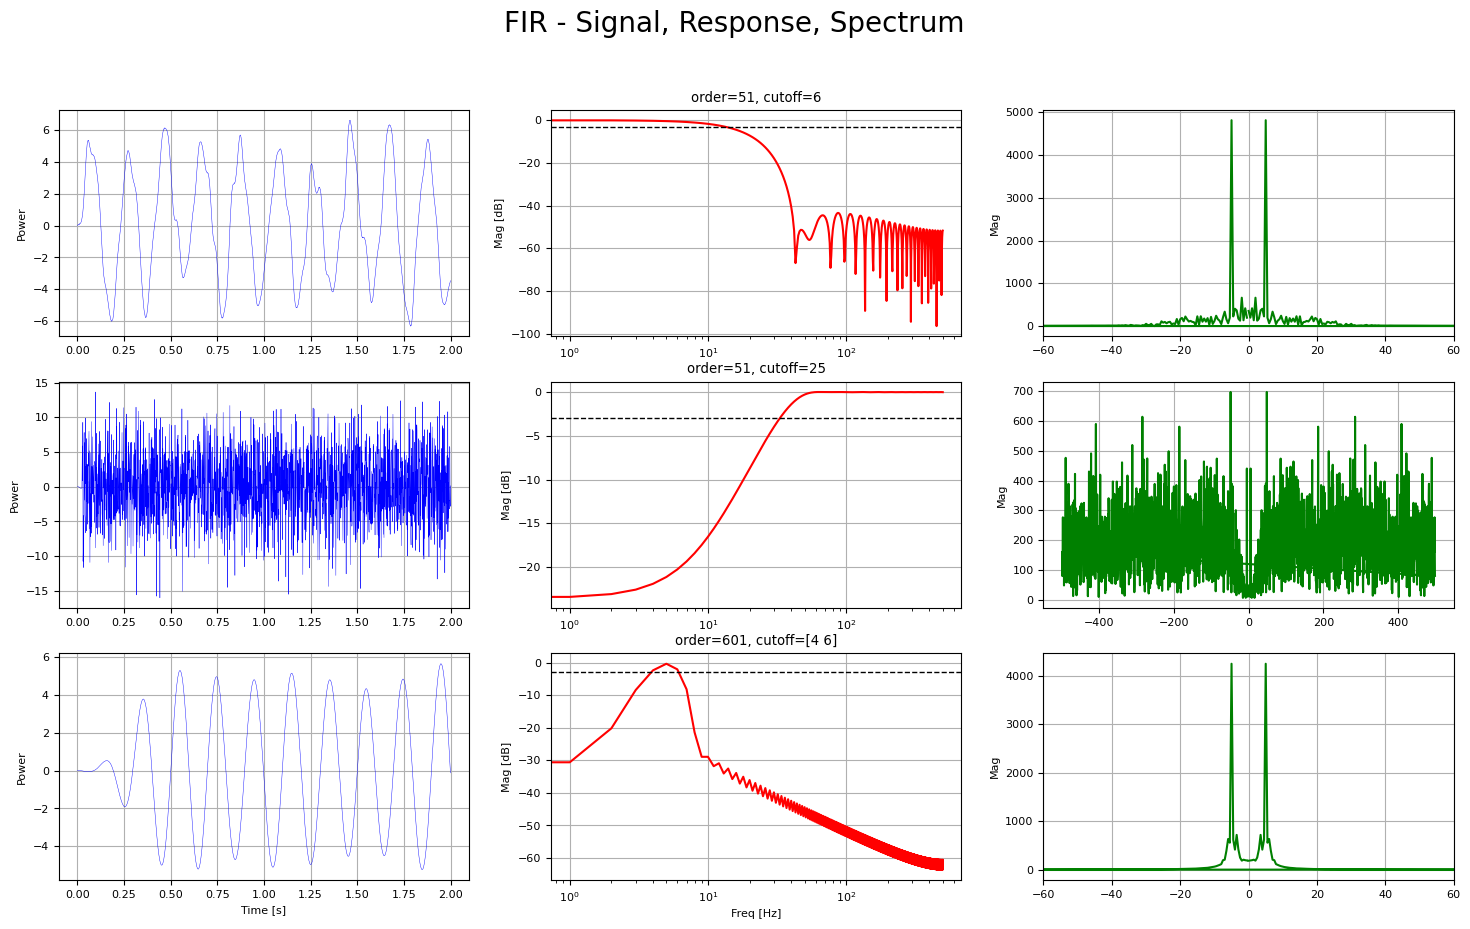

In [4]:
# meta params and values
order = 51
plt.figure(figsize=(18, 10))
plt.suptitle(f"FIR - Signal, Response, Spectrum", fontsize=20)
impulse = np.zeros(1000)
impulse[500] = 1

# LOW PASS ---------------------------------------------
cutoff = 6
b = signal.firwin(order, cutoff=cutoff, fs=fs)
X_fil = signal.lfilter(b, a=1.0, x=X)

plt.subplot(331)
plt.plot(T, X_fil, 'b-', linewidth=0.3)
plt.ylabel('Power')

imp_resp = signal.lfilter(b, a=1.0, x=impulse)

plt.subplot(332)
plt.semilogx(20*np.log10(np.abs(np.fft.rfft(imp_resp))), 'r-')
plt.axhline(-3, linestyle='--', color='k', linewidth=1)
plt.ylabel("Mag [dB]")
plt.title(f'order={order}, cutoff={cutoff}')

ft = np.abs(np.fft.fft(X_fil))

plt.subplot(333)
plt.plot(np.fft.fftfreq(len(X_fil), 1/fs), ft, 'g-')
plt.xlim(-60,60)
plt.ylabel('Mag')

# HIGH PASS ---------------------------------------------
cutoff = 25
b = signal.firwin(order, cutoff=cutoff, fs=fs, pass_zero=False)
X_fil = signal.lfilter(b, a=1.0, x=X)

plt.subplot(334)
plt.plot(T, X_fil, 'b-', linewidth=0.3)
plt.ylabel('Power')

imp_resp = signal.lfilter(b, a=1.0, x=impulse)

plt.subplot(335)
plt.semilogx(20*np.log10(np.abs(np.fft.rfft(imp_resp))), 'r-')
plt.axhline(-3, linestyle='--', color='k', linewidth=1)
plt.ylabel("Mag [dB]")
plt.title(f'order={order}, cutoff={cutoff}')

ft = np.abs(np.fft.fft(X_fil))

plt.subplot(336)
plt.plot(np.fft.fftfreq(len(X_fil), 1/fs), ft, 'g-')
# plt.xlim(-60,60)
plt.ylabel('Mag')

# BAND PASS ---------------------------------------------
cutoff = np.array([4, 6])
b = signal.firwin(601, cutoff=cutoff, fs=fs, pass_zero=False)
X_fil = signal.lfilter(b, a=1.0, x=X)

plt.subplot(337)
plt.plot(T, X_fil, 'b-', linewidth=0.3)
plt.xlabel('Time [s]')
plt.ylabel('Power')

imp_resp = signal.lfilter(b, a=1.0, x=impulse)

plt.subplot(338)
plt.semilogx(20*np.log10(np.abs(np.fft.rfft(imp_resp))), 'r-')
plt.axhline(-3, linestyle='--', color='k', linewidth=1)
plt.xlabel("Freq [Hz]")
plt.ylabel("Mag [dB]")
plt.title(f'order={601}, cutoff={cutoff}')

ft = np.abs(np.fft.fft(X_fil))

plt.subplot(339)
plt.plot(np.fft.fftfreq(len(X_fil), 1/fs), ft, 'g-')
plt.xlim(-60,60)
plt.ylabel('Mag')

## IIR
Secondly, IIR (Infinite Impulse Response) filter is used. It's frequency response is given by following expression.
$$H(z) = \frac{b_0 + \sum_{i=1}^{M} b_i z^{-i}}{1 + \sum_{i=1}^{N} a_i z^{-i}}$$
IIR filters need much lower order than FIR filters to give similar impulse response. Their design is more complex and there are few methods that are used to obtain a design with given cutoff frequency or bandpass. IIR method gave similiar results but the nonlinear phase shift is present 

Text(0, 0.5, 'Mag')

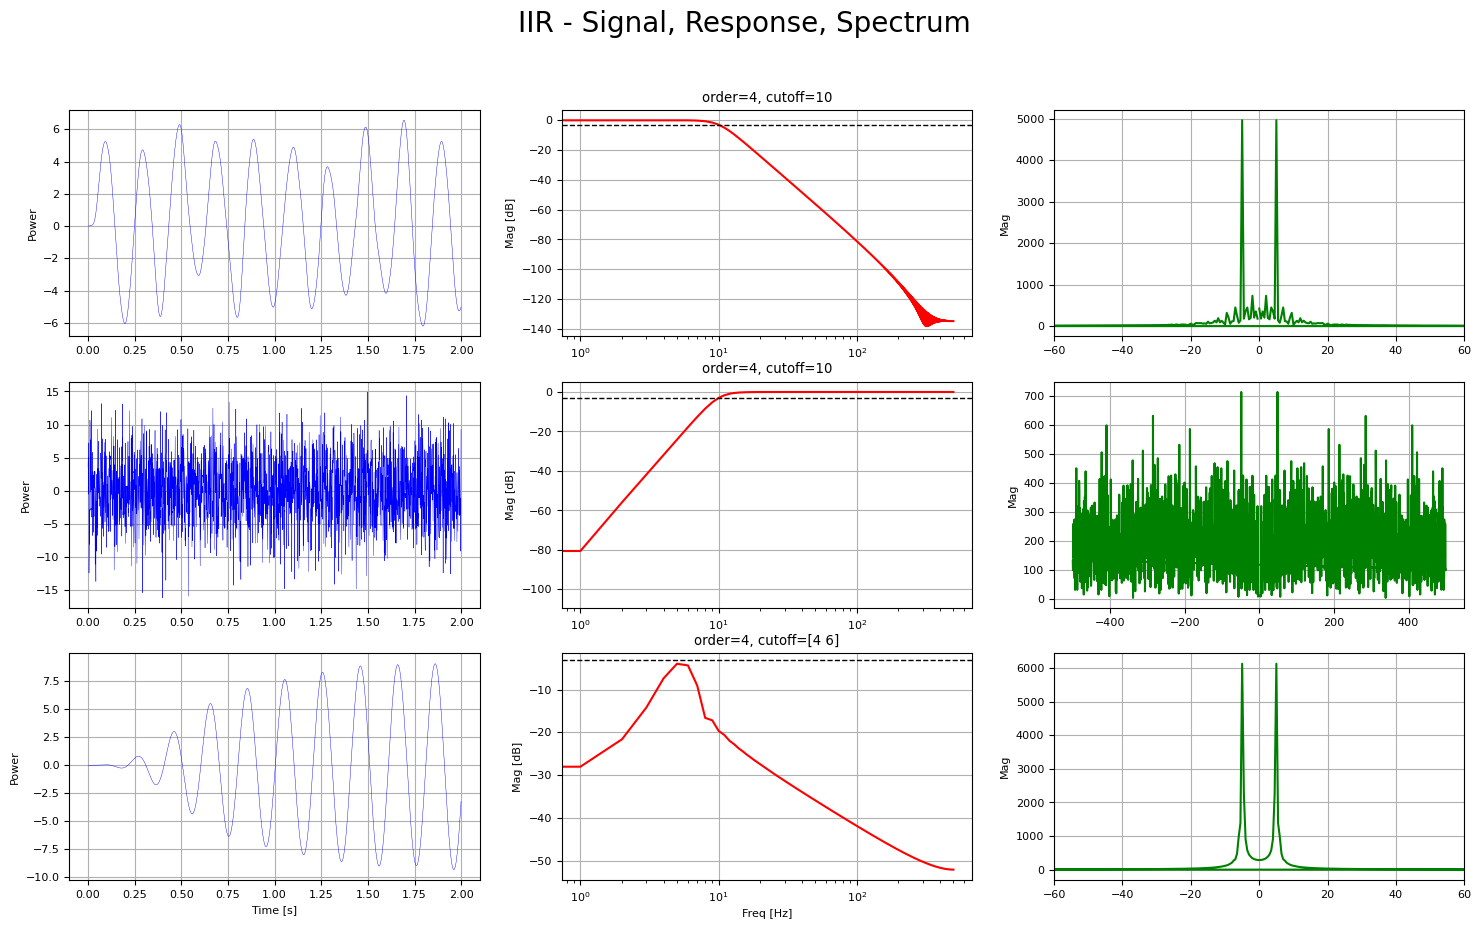

In [5]:
# meta params and values
order = 4
plt.figure(figsize=(18, 10))
plt.suptitle(f"IIR - Signal, Response, Spectrum", fontsize=20)
impulse = np.zeros(1000)
impulse[500] = 1

# LOW PASS ---------------------------------------------
cutoff = 10
b, a = signal.butter(order, Wn=cutoff, fs=fs, btype='low')
X_fil = signal.lfilter(b, a, x=X)

plt.subplot(331)
plt.plot(T, X_fil, 'b-', linewidth=0.3)
plt.ylabel('Power')

imp_resp = signal.lfilter(b, a, x=impulse)

plt.subplot(332)
plt.semilogx(20*np.log10(np.abs(np.fft.rfft(imp_resp))), 'r-')
plt.axhline(-3, linestyle='--', color='k', linewidth=1)
plt.ylabel("Mag [dB]")
plt.title(f'order={order}, cutoff={cutoff}')

ft = np.abs(np.fft.fft(X_fil))

plt.subplot(333)
plt.plot(np.fft.fftfreq(len(X_fil), 1/fs), ft, 'g-')
plt.xlim(-60,60)
plt.ylabel('Mag')

# HIGH PASS ---------------------------------------------
cutoff = 10
b, a = signal.butter(order, Wn=cutoff, fs=fs, btype='high')
X_fil = signal.lfilter(b, a, x=X)

plt.subplot(334)
plt.plot(T, X_fil, 'b-', linewidth=0.3)
plt.ylabel('Power')

imp_resp = signal.lfilter(b, a, x=impulse)

plt.subplot(335)
plt.semilogx(20*np.log10(np.abs(np.fft.rfft(imp_resp))), 'r-')
plt.axhline(-3, linestyle='--', color='k', linewidth=1)
plt.ylabel("Mag [dB]")
plt.title(f'order={order}, cutoff={cutoff}')

ft = np.abs(np.fft.fft(X_fil))

plt.subplot(336)
plt.plot(np.fft.fftfreq(len(X_fil), 1/fs), ft, 'g-')
# plt.xlim(-60,60)
plt.ylabel('Mag')

# BAND PASS ---------------------------------------------
cutoff = np.array([4, 6])
b, a = signal.butter(order, Wn=cutoff, fs=fs, btype='band')
X_fil = signal.lfilter(b, a, x=X)

plt.subplot(337)
plt.plot(T, X_fil, 'b-', linewidth=0.3)
plt.xlabel('Time [s]')
plt.ylabel('Power')

imp_resp = signal.lfilter(b, a, x=impulse)

plt.subplot(338)
plt.semilogx(20*np.log10(np.abs(np.fft.rfft(imp_resp))), 'r-')
plt.axhline(-3, linestyle='--', color='k', linewidth=1)
plt.xlabel("Freq [Hz]")
plt.ylabel("Mag [dB]")
plt.title(f'order={order}, cutoff={cutoff}')

ft = np.abs(np.fft.fft(X_fil))

plt.subplot(339)
plt.plot(np.fft.fftfreq(len(X_fil), 1/fs), ft, 'g-')
plt.xlim(-60,60)
plt.ylabel('Mag')

# 3. Two sine waves
In this section IIR filter was used to filter out two separate sine wave functions from their superposition. A cutoff frequency was chosen and both high-pass and low-pass variants gave sufficient result which can be observed on the spectrums. On the first one below, two peaks are visible corresponding to each wave. However, the filtered one contain only one peak which tells the filtration was successful.

(-60.0, 60.0)

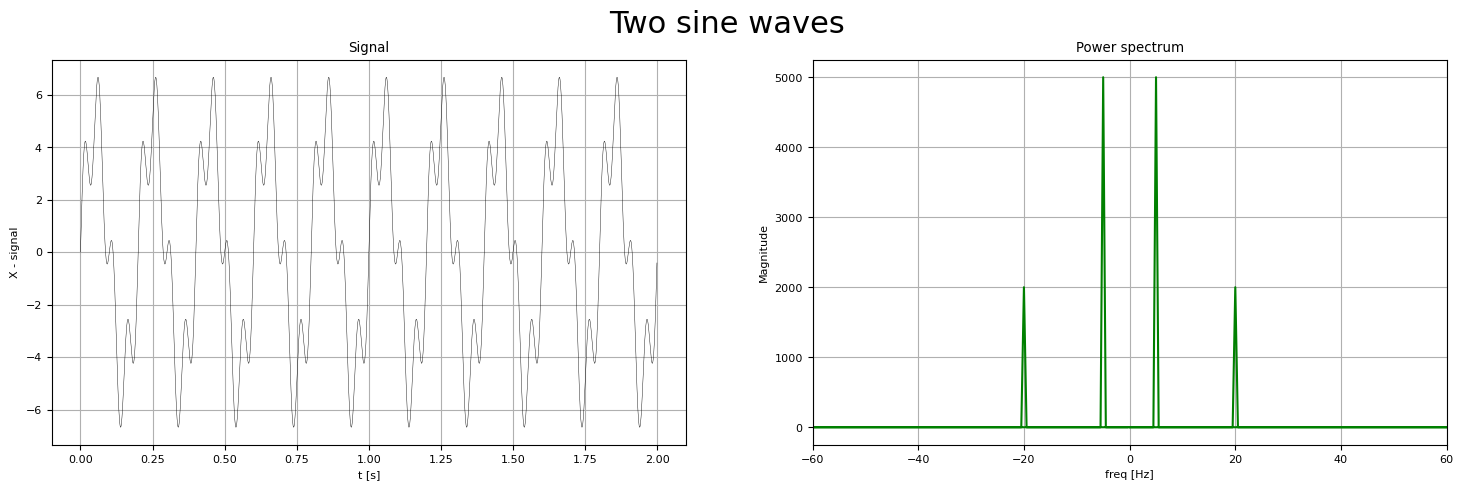

In [6]:
N = 2000
A1 = 5
A2 = 2
f1 = 5
f2 = 20
fs = 1000
T = np.arange(N) / fs
X = A1 * np.sin(2 * np.pi * f1 * T) + A2 * np.sin(2 * np.pi * f2 * T)

plt.figure(figsize=(18, 5))
plt.suptitle('Two sine waves', fontsize=22)

plt.subplot(121)
plt.plot(T, X, 'k-', linewidth = 0.3)
plt.xlabel('t [s]')
plt.ylabel('X - signal')
plt.title('Signal')

ft = np.abs(np.fft.fft(X))
freq = np.fft.fftfreq(len(T), 1/fs)

plt.subplot(122)
plt.plot(freq, ft, 'g-')
plt.xlabel('freq [Hz]')
plt.ylabel('Magnitude')
plt.title('Power spectrum')
plt.xlim(-60, 60)

Text(0, 0.5, 'Mag')

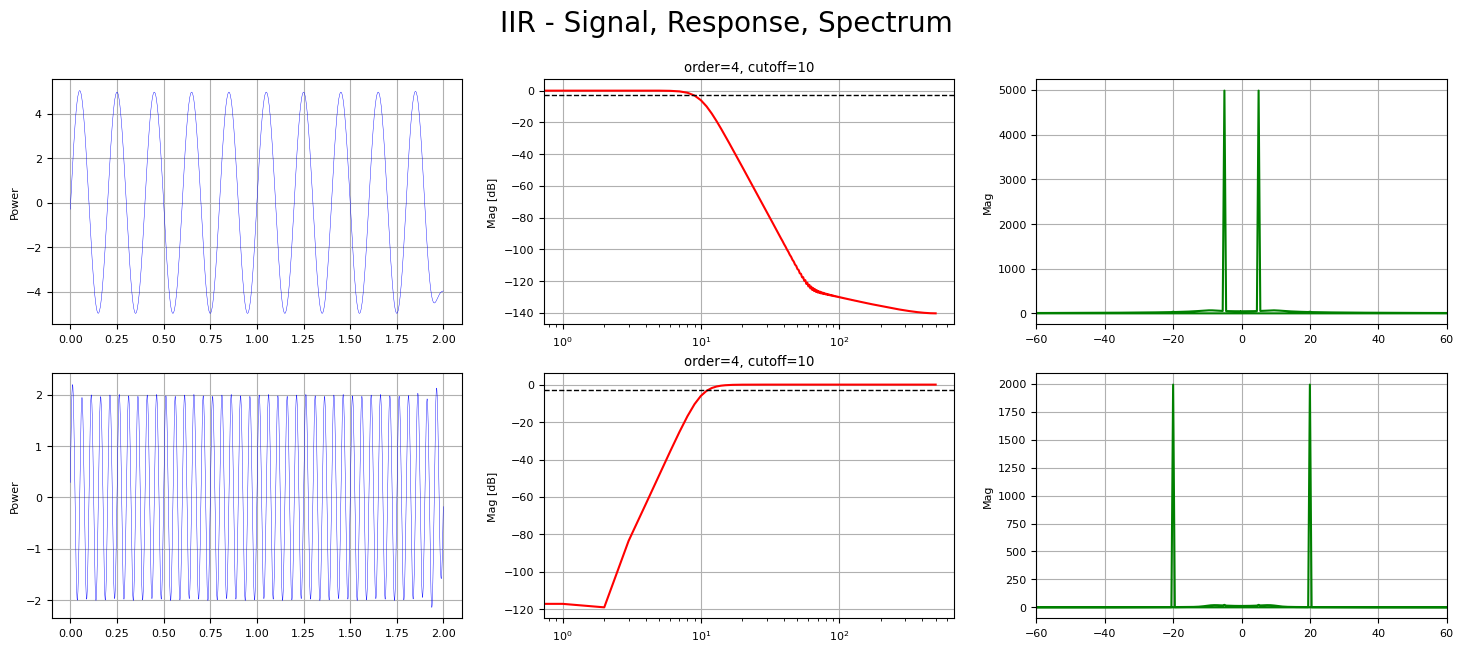

In [7]:
# meta params and values
order = 4
plt.figure(figsize=(18, 7))
plt.suptitle(f"IIR - Signal, Response, Spectrum", fontsize=20)
impulse = np.zeros(1000)
impulse[500] = 1

# FIRST SINE ---------------------------------------------
cutoff = 10
b, a = signal.butter(order, Wn=cutoff, fs=fs, btype='low')
X_fil = signal.filtfilt(b, a, x=X)

plt.subplot(231)
plt.plot(T, X_fil, 'b-', linewidth=0.3)
plt.ylabel('Power')

imp_resp = signal.filtfilt(b, a, x=impulse)

plt.subplot(232)
plt.semilogx(20*np.log10(np.abs(np.fft.rfft(imp_resp))), 'r-')
plt.axhline(-3, linestyle='--', color='k', linewidth=1)
plt.ylabel("Mag [dB]")
plt.title(f'order={order}, cutoff={cutoff}')

ft = np.abs(np.fft.fft(X_fil))

plt.subplot(233)
plt.plot(np.fft.fftfreq(len(X_fil), 1/fs), ft, 'g-')
plt.xlim(-60,60)
plt.ylabel('Mag')

# SECOND SINE ---------------------------------------------
cutoff = 10
b, a = signal.butter(order, Wn=cutoff, fs=fs, btype='high')
X_fil = signal.filtfilt(b, a, x=X)

plt.subplot(234)
plt.plot(T, X_fil, 'b-', linewidth=0.3)
plt.ylabel('Power')

imp_resp = signal.filtfilt(b, a, x=impulse)

plt.subplot(235)
plt.semilogx(20*np.log10(np.abs(np.fft.rfft(imp_resp))), 'r-')
plt.axhline(-3, linestyle='--', color='k', linewidth=1)
plt.ylabel("Mag [dB]")
plt.title(f'order={order}, cutoff={cutoff}')

ft = np.abs(np.fft.fft(X_fil))

plt.subplot(236)
plt.plot(np.fft.fftfreq(len(X_fil), 1/fs), ft, 'g-')
plt.xlim(-60,60)
plt.ylabel('Mag')

# 4. ECG signal
This last section shows the filtration of a raw ECG signal to obtain a prepared data for medical or mechanical analysis. Data was imported from the ecg.mat file ([path in local device](ecg.mat)). On the frequency spectrum on can see that various frequencies are present, which is valid for cardial analysis. However, some parts of it are unwanted. Particularly there are very low frequencies which can represent the electrical noise. Secondly there is frequency of 50Hz present and from real world knowledge we conlude it comes from European standard socket. Both of these artifacts are removed by a bandpass filter with cutoff frequencies found in experimental manner. To eliminate phase shift, forward-backward algorithm was used which is implemented in *filtfilt* method.  

(-60.0, 60.0)

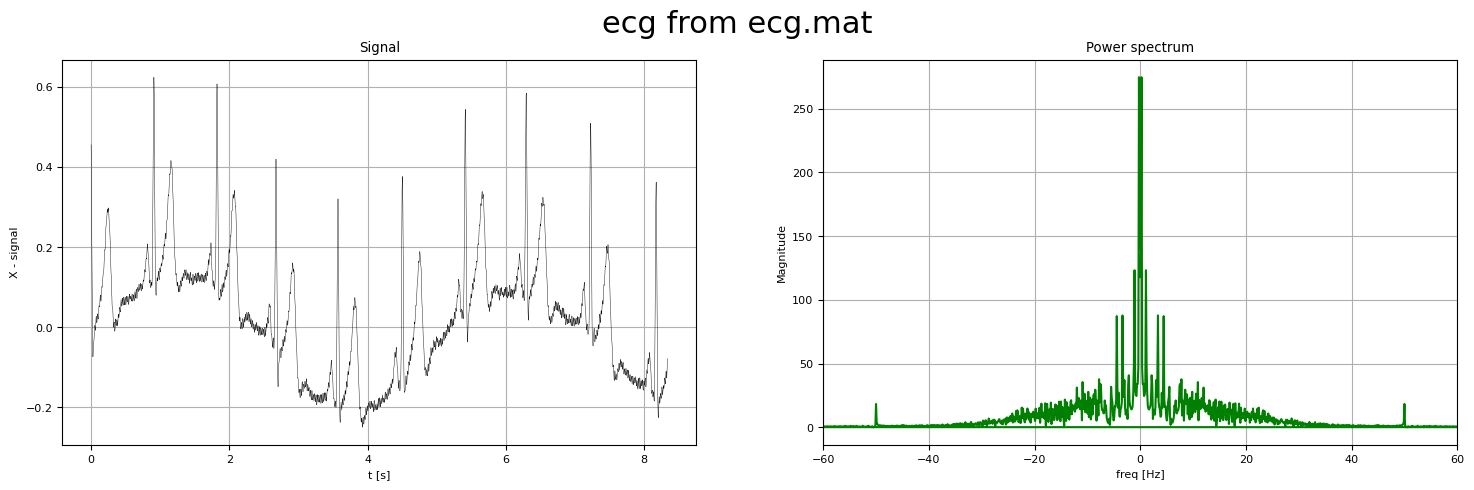

In [8]:
path = 'ecg.mat'
data = matlab.loadmat(path)
fs = 500 # see: instruction
X = data['ecg'].flatten()

T = np.arange(len(X)) / fs

plt.figure(figsize=(18, 5))
plt.suptitle(f'ecg from {path}', fontsize=22)

plt.subplot(121)
plt.plot(T, X, 'k-', linewidth = 0.3)
plt.xlabel('t [s]')
plt.ylabel('X - signal')
plt.title('Signal')

ft = np.abs(np.fft.fft(X))
freq = np.fft.fftfreq(len(X), 1/fs)

plt.subplot(122)
plt.plot(freq, ft, 'g-')
plt.xlabel('freq [Hz]')
plt.ylabel('Magnitude')
plt.title('Power spectrum')
plt.xlim(-60, 60)

Text(0, 0.5, 'Mag')

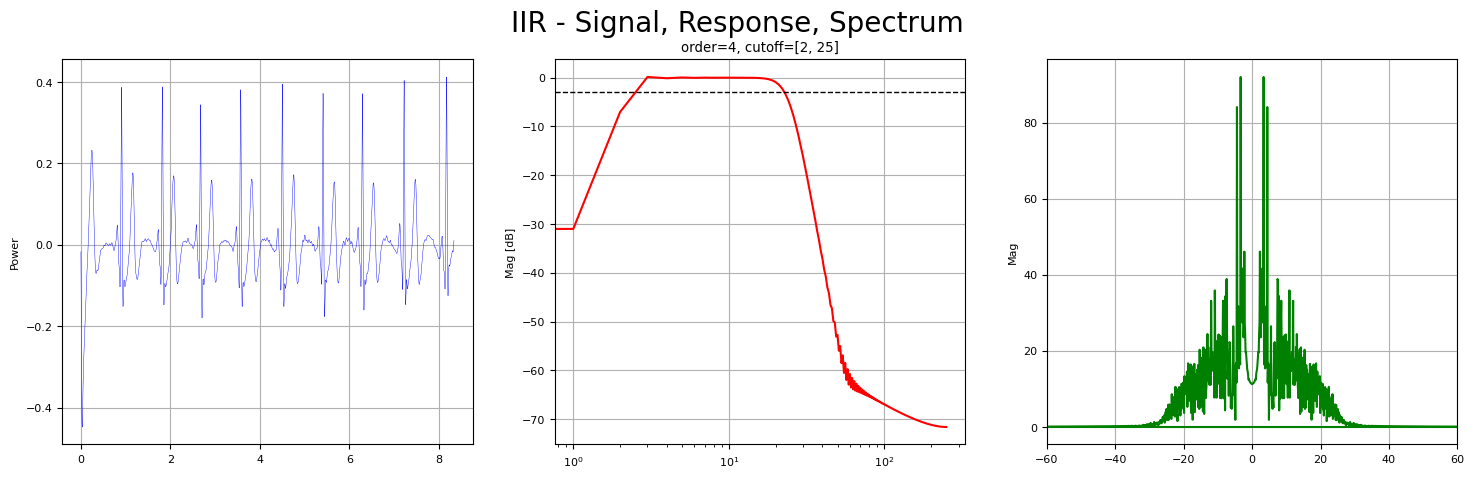

In [9]:
# meta params and values
order = 4
plt.figure(figsize=(18, 5))
plt.suptitle(f"IIR - Signal, Response, Spectrum", fontsize=20)
impulse = np.zeros(500)
impulse[250] = 1

# BAND PASS ---------------------------------------------
cutoff = [2, 25]
b, a = signal.butter(order, Wn=cutoff, fs=fs, btype='bandpass')
X_fil = signal.filtfilt(b, a, x=X)

plt.subplot(131)
plt.plot(T, X_fil, 'b-', linewidth=0.3)
plt.ylabel('Power')

imp_resp = signal.filtfilt(b, a, x=impulse)

plt.subplot(132)
plt.semilogx(20*np.log10(np.abs(np.fft.rfft(imp_resp))), 'r-')
plt.axhline(-3, linestyle='--', color='k', linewidth=1)
plt.ylabel("Mag [dB]")
plt.title(f'order={order}, cutoff={cutoff}')

ft = np.abs(np.fft.fft(X_fil))

plt.subplot(133)
plt.plot(np.fft.fftfreq(len(X_fil), 1/fs), ft, 'g-')
plt.xlim(-60,60)
plt.ylabel('Mag')

# 5. Summary
Filtering methods were explored in this laboratory and various methods and filters were implemented. Both superficial and real world data was used as study cases.